In [23]:
# ================================================================
# Multivariable Regression: Predicting Hourly Energy Demand (MWh)
# SDG 7: Affordable and Clean Energy
# ================================================================
# PROBLEM STATEMENT:
# Build a regression model to predict energy demand based on:
# - Temperature
# - Time of Day
# - Humidity
#
# Idea:
# Energy demand usually increases when temperature is very high (cooling)
# or very low (heating), and also during daytime. Humidity has a smaller effect.
# This simulated dataset captures a realistic pattern and trains quickly.
# ================================================================

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score


# ================================================================
# 2. DATA GENERATION (Simulated for fast execution)
# ================================================================
np.random.seed(42)
N_SAMPLES = 500

# Features
temperature = np.random.uniform(5, 35, N_SAMPLES)       # 5°C to 35°C
time_of_day = np.random.randint(0, 24, N_SAMPLES)       # Hour of the day
humidity = np.random.uniform(30, 95, N_SAMPLES)         # Relative humidity %

# Target Variable:
# Basic pattern: demand rises with temperature, time of day, and at extremes
demand_base = 250 + 5 * time_of_day + 1.5 * temperature
demand_peak = np.where((temperature > 28) | (temperature < 10),
                       demand_base + 80, demand_base)

energy_demand = demand_peak + np.random.normal(0, 25, N_SAMPLES)

# Create DataFrame
df = pd.DataFrame({
    "Temperature": temperature,
    "Time_of_Day": time_of_day,
    "Humidity": humidity,
    "Energy_Demand_MWh": energy_demand
})

df.head()


,Temperature,Time_of_Day,Humidity,Energy_Demand_MWh
0,16.236204,21,61.254404,365.279464
1,33.521429,16,89.699557,458.235876
2,26.959818,8,68.159435,297.659202
3,22.959755,0,32.135034,314.400756
4,9.680559,20,89.328715,432.278352


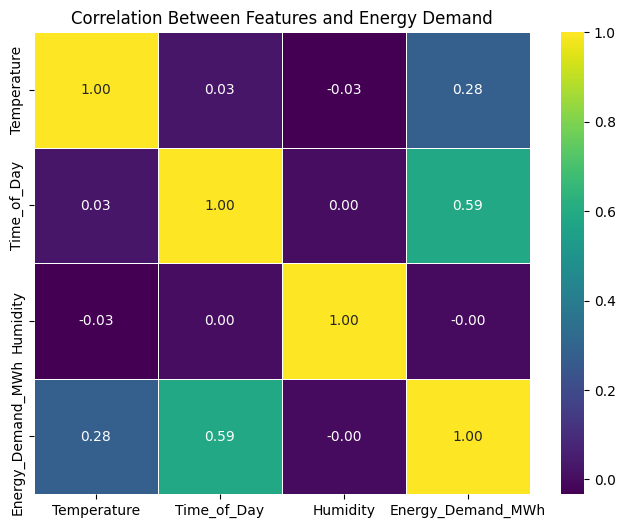

In [24]:
# ================================================================
# 3. VISUALIZATION: Correlation Heatmap
# ================================================================

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Features and Energy Demand")
plt.show()


In [25]:
# ================================================================
# 4. DATA PREPARATION
# ================================================================

# Target variable
y = df["Energy_Demand_MWh"]

# Features
X = df[["Temperature", "Time_of_Day", "Humidity"]]

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
# ================================================================
# 5. MODEL TRAINING (Decision Tree Regressor)
# ================================================================
# Decision Tree is chosen because it is able to model non-linear patterns.
# max_depth=5 prevents the model from memorizing noise.

model = DecisionTreeRegressor(max_depth=5, random_state=42)

model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [27]:
# ================================================================
# 6. MODEL EVALUATION
# ================================================================

# Predict on test set
y_pred = model.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared Score:", round(r2, 4))
print("Mean Absolute Error:", round(mae, 2), "MWh")


R-squared Score: 0.6598
Mean Absolute Error: 25.73 MWh


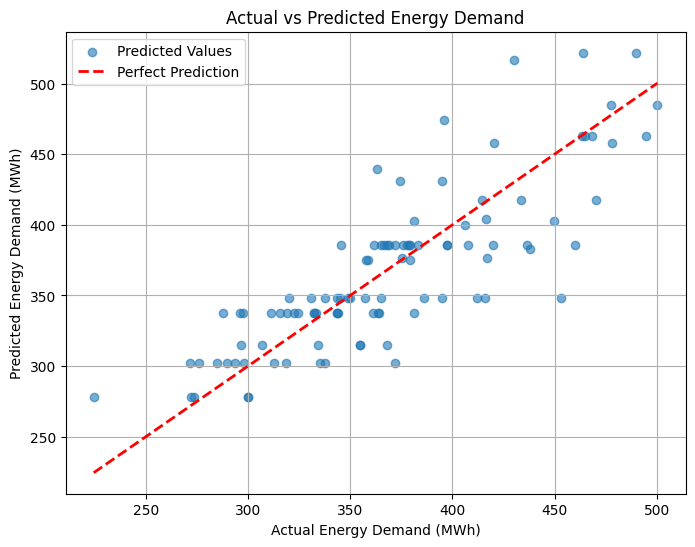

In [28]:
# ================================================================
# 7. VISUALIZATION: Actual vs Predicted
# ================================================================

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted Values")

# Reference line for perfect prediction
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", linewidth=2, label="Perfect Prediction")

plt.title("Actual vs Predicted Energy Demand")
plt.xlabel("Actual Energy Demand (MWh)")
plt.ylabel("Predicted Energy Demand (MWh)")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
# ================================================================
# 8. FINAL PREDICTION TEST
# ================================================================

# Example scenario:
# Temperature = 30°C
# Time of day = 15 (3 PM)
# Humidity = 60%

example = np.array([[30, 15, 60]])
predicted_value = model.predict(example)[0]

print("Predicted Energy Demand for [30°C, 15:00, 60% humidity]:",
      round(predicted_value, 2), "MWh")


Predicted Energy Demand for [30°C, 15:00, 60% humidity]: 463.18 MWh


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
